<a href="https://colab.research.google.com/github/vivekreddy31/Pyhton-Basic/blob/main/18_02_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install blis

In [3]:
!pip install -U spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.


## Word Tokenization

In [7]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
import nltk
import spacy

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

text = "Hello How are you? I am learning NLP. Welcome to U.S.A "

nlp = spacy.load("en_core_web_sm")

doc = nlp(text)


spacy_tokens = [token.text for token in doc]


word_tokens = nltk.word_tokenize(text)
sent_tokens = nltk.sent_tokenize(text)

print("Word Tokens:", word_tokens)
print("Sentence Tokens:", sent_tokens)
print("Spacy Tokens:", spacy_tokens)

Word Tokens: ['Hello', 'How', 'are', 'you', '?', 'I', 'am', 'learning', 'NLP', '.', 'Welcome', 'to', 'U.S.A']
Sentence Tokens: ['Hello How are you?', 'I am learning NLP.', 'Welcome to U.S.A']
Spacy Tokens: ['Hello', 'How', 'are', 'you', '?', 'I', 'am', 'learning', 'NLP', '.', 'Welcome', 'to', 'U.S.A']


##Stop word Removal

In [11]:
spacy_stopwords = [token.text for token in doc if not token.is_stop]
print("Spacy Filtered Words:", spacy_stopwords)

Spacy Filtered Words: ['Hello', '?', 'learning', 'NLP', '.', 'Welcome', 'U.S.A']


##Lemmatization

In [12]:
lemmatized_words = [token.lemma_ for token in doc]

print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['hello', 'how', 'be', 'you', '?', 'I', 'be', 'learn', 'NLP', '.', 'welcome', 'to', 'U.S.A']


##Lower Case and Removal Punctuations

In [13]:
import re
text = "Hello!! This is NLP 101. Visit https://example.com"
cleaned_text = re.sub(r'[^\w\s]', '', text)
lower_text = cleaned_text.lower()
print("Cleaned Text:", lower_text)

Cleaned Text: hello this is nlp 101 visit httpsexamplecom


##parts of Speech

In [14]:
for token in doc:
    print(f"{token.text} --> {token.pos_}")

Hello --> INTJ
How --> SCONJ
are --> AUX
you --> PRON
? --> PUNCT
I --> PRON
am --> AUX
learning --> VERB
NLP --> PROPN
. --> PUNCT
Welcome --> INTJ
to --> ADP
U.S.A --> PROPN


##NER

In [15]:
for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")

NLP --> ORG
U.S.A --> GPE


##Word2Vec Embeddings

In [17]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

model = Word2Vec(sentences=common_texts, vector_size=2, window=5, min_count=1, workers=4)


##Embeddings for a word

In [18]:
print("Vector for 'computer':", model.wv['computer'])

Vector for 'computer': [-0.4144216  -0.47262433]


##Most similar words

In [20]:
print("Most similar words to 'computer':", model.wv.most_similar('eps'))

Most similar words to 'computer': [('user', 0.999955952167511), ('computer', 0.9786133766174316), ('time', 0.9593401551246643), ('system', 0.48973968625068665), ('response', -0.038118645548820496), ('minors', -0.661042332649231), ('human', -0.862139880657196), ('graph', -0.9164512157440186), ('survey', -0.9518176913261414), ('trees', -0.9543961882591248)]


##Visualizing closest words

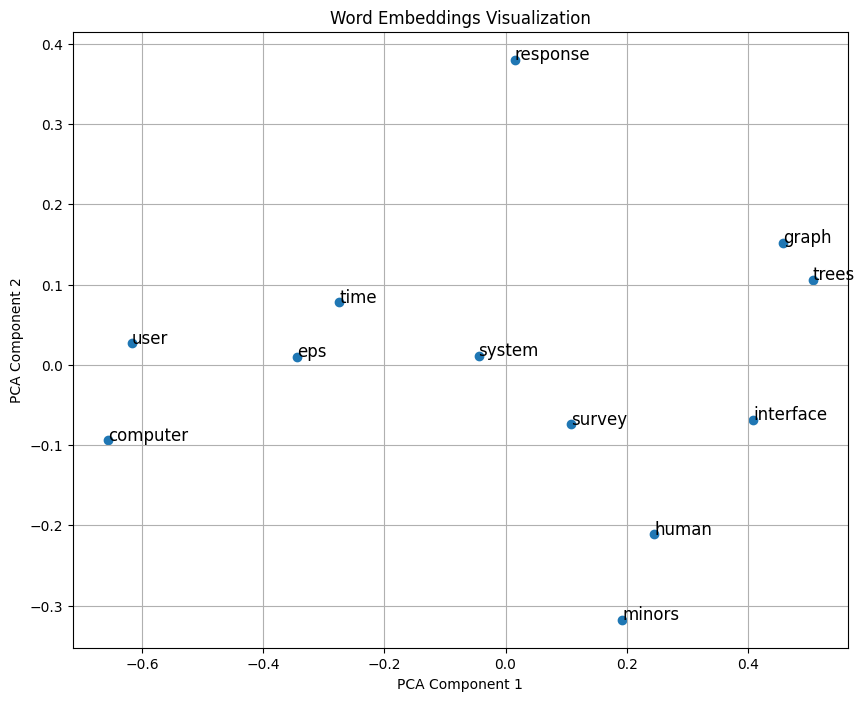

In [21]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


word_vectors = model.wv[model.wv.index_to_key]  # Get the word vectors
pca = PCA(n_components=2)  # Initialize PCA
result = pca.fit_transform(word_vectors)  # Fit and transform the word vectors


plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])


words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()